In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

In [2]:
chotot = pd.read_csv("./preprocess/chotot.csv")
bonbanh = pd.read_csv("./preprocess/bonbanh.csv")
print(*[i for i in 'Hãng khác'])

H a ̃ n g   k h á c


In [3]:
df = pd.read_csv('./preprocess/mix_data.csv', sep = ",", index_col=0)
df.hang = df.hang.replace(["Hãng khác"],["Hãng khác"])
df.head()

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche


In [4]:
# Chỉ chọn những xe có giá từ 10 triệu đến 100 tỷ ( Vì ở Việt Nam xe đắt tiền nhất mới lên tới 80 tỷ )
df = df[(df.gia > 1e7) & (df.gia < 1e11)]

In [5]:
# Chỉ chọn những hãng có > 9 xe
filter = df.hang.value_counts()
filter_hang = filter.index.get_level_values(0)
value = filter.values
filter = []
for hang, v in zip(filter_hang, value):
    if v > 9:
        filter.append(hang)

df = df[df.hang.isin(filter)]

In [6]:
# Có khả năng người dùng nhập nhầm năm sản xuất : 2022 
df.nam_sx = df.nam_sx.replace(["2022"],["2021"])

In [7]:
print(df.shape) # 54978 cột, 11 hàng
df.dtypes

(54599, 11)


kieu_dang      object
hop_so         object
km_da_di        int64
nhien_lieu     object
so_cho_ngoi    object
tinh_trang     object
xuat_xu        object
nam_sx         object
gia             int64
dong_xe        object
hang           object
dtype: object

### Hãng xe

In [8]:
print(df.hang.describe())
'''
    Có tổng 95 hãng xe
    Trong đó phổ biến nhất Toyota với tần xuất 11860
'''

count      54599
unique        62
top       Toyota
freq       11819
Name: hang, dtype: object


'\n    Có tổng 95 hãng xe\n    Trong đó phổ biến nhất Toyota với tần xuất 11860\n'

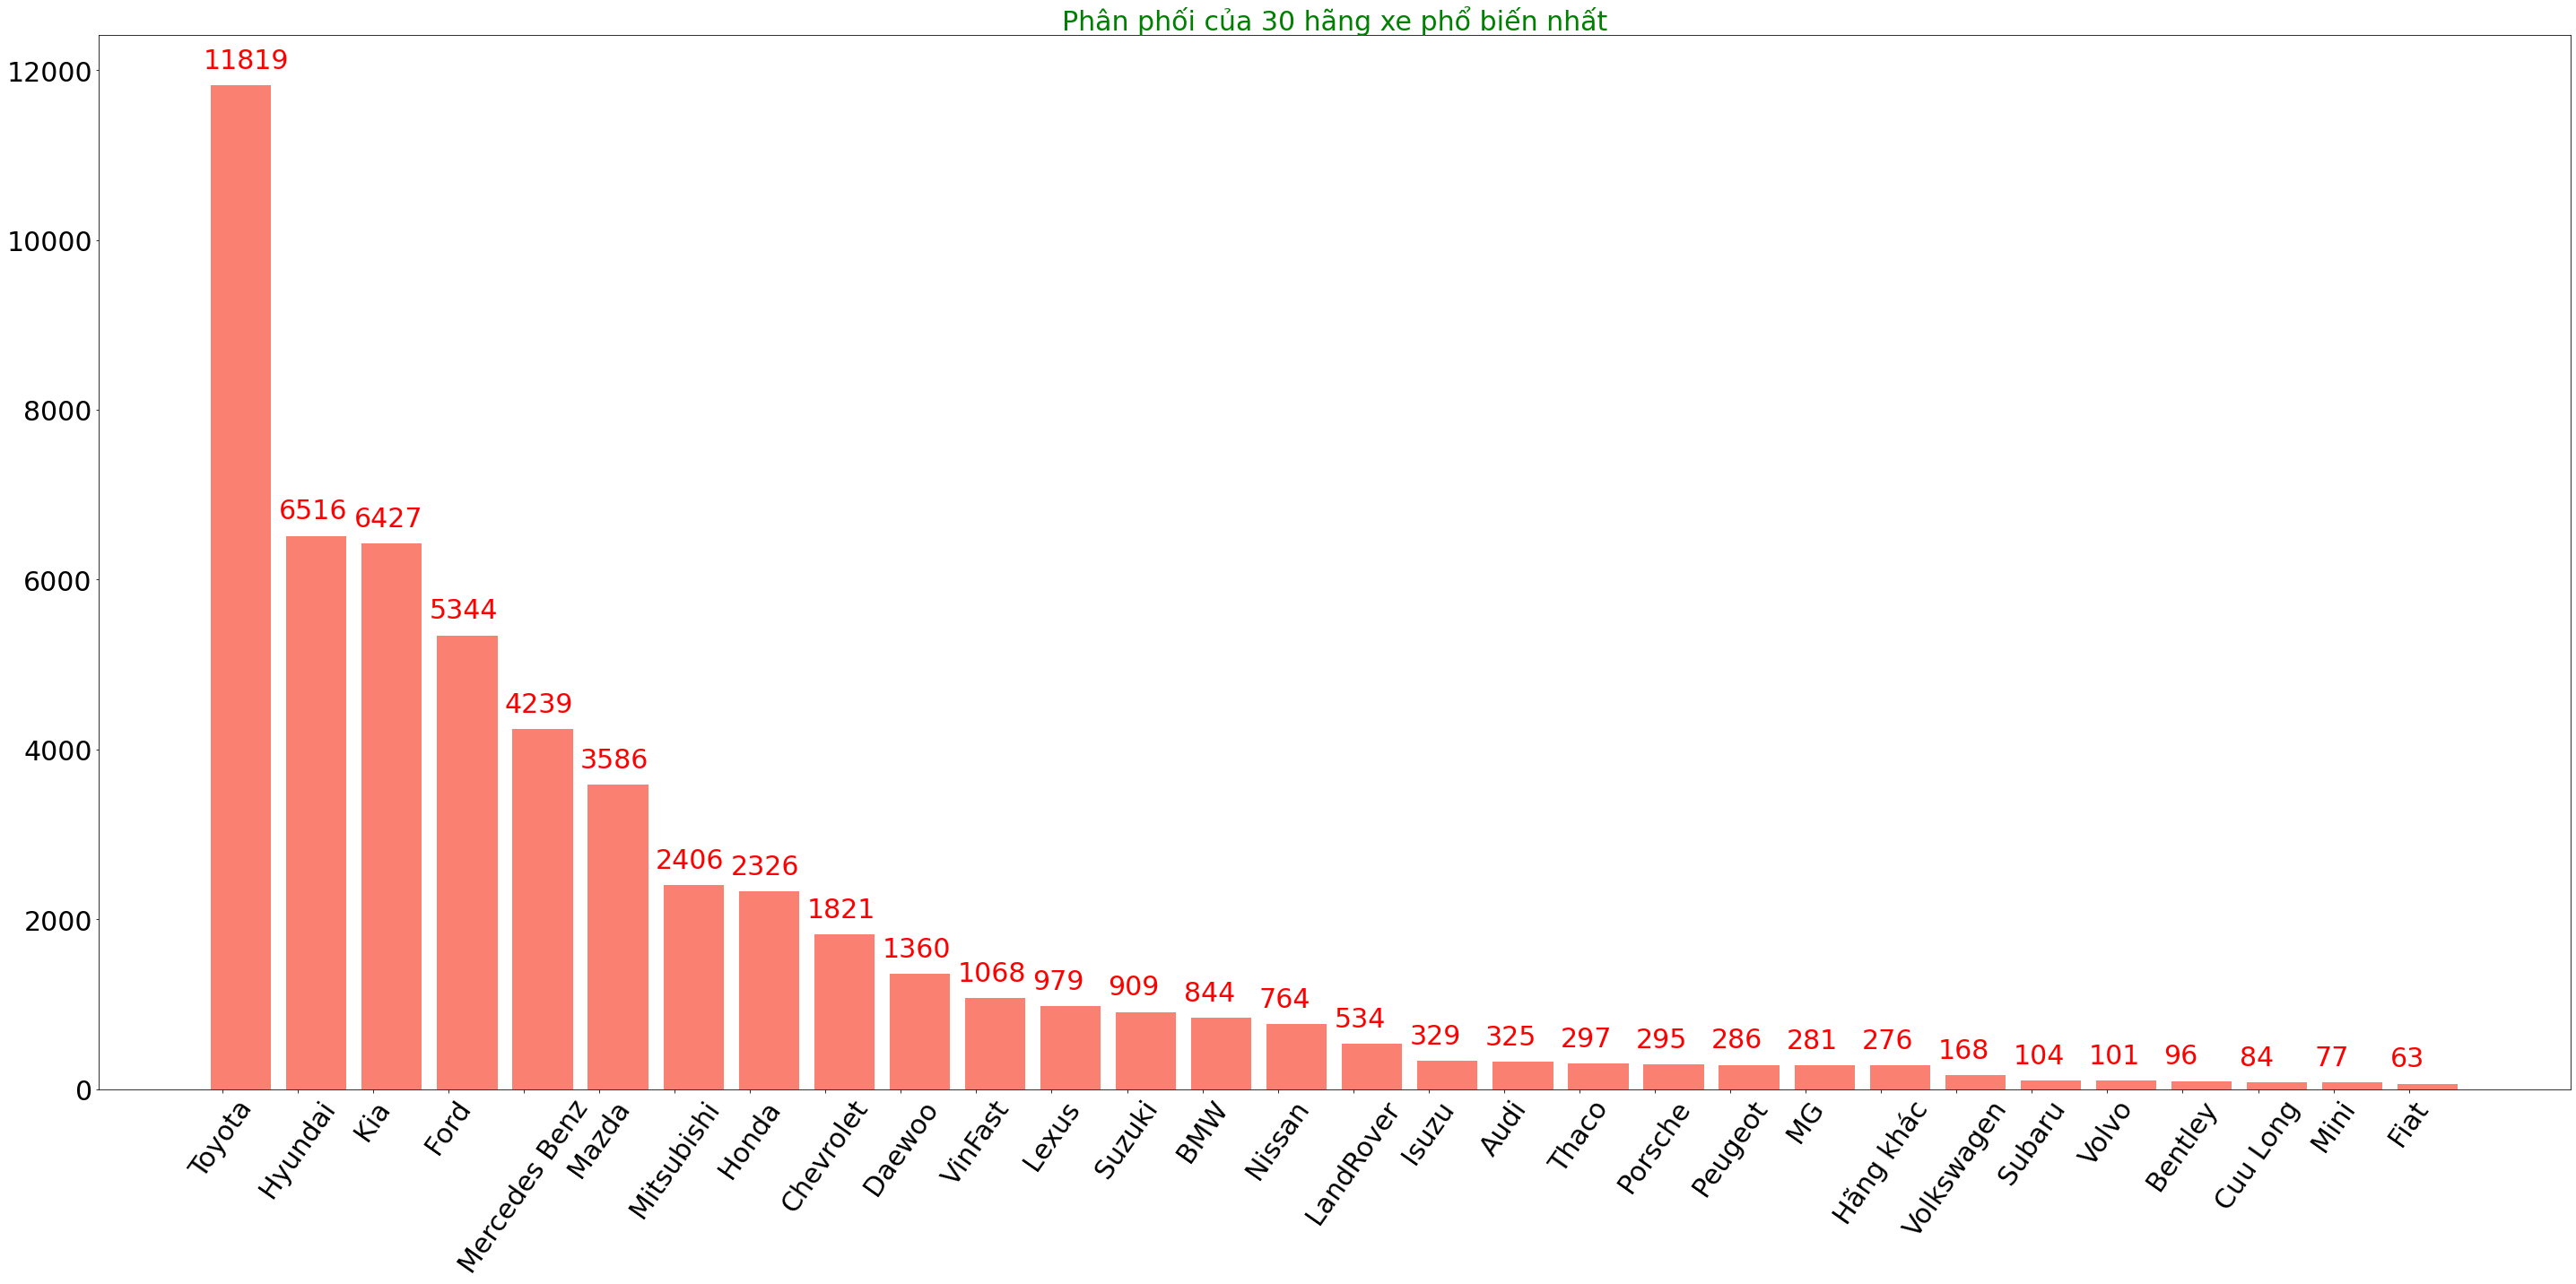

In [9]:
fig, ax = plt.subplots(figsize = (40,20))
x = []
y = []
for idx, value in enumerate(df['hang'].value_counts()[:30].items()):
    x.append(value[0])
    y.append(value[1])
    ax.text(x = idx-0.5, y = (value[1] + 200), s = str(value[1]), color = 'red', fontdict=dict(fontsize=30))
    #print(value[1])
ax.bar(x,y, color = "salmon", width = 0.8)
#plt.sca(ax1)
plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 30)
plt.yticks(fontsize = 30)
plt.title(label="Phân phối của 30 hãng xe phổ biến nhất", fontdict=dict(fontsize = 30, color = "green"))
plt.tight_layout()
plt.show()

In [10]:
df[ ( df.hang.isin(list(df.hang.value_counts().sort_values(ascending = False)[:40].index.get_level_values(0))) ) ]

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
54991,Van/Minivan,Số sàn,80000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2019,565000000,Innova,Toyota
54992,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,563000000,3,Mazda
54993,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,185000000,Morning,Kia
54994,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,42500000,Matiz,Daewoo


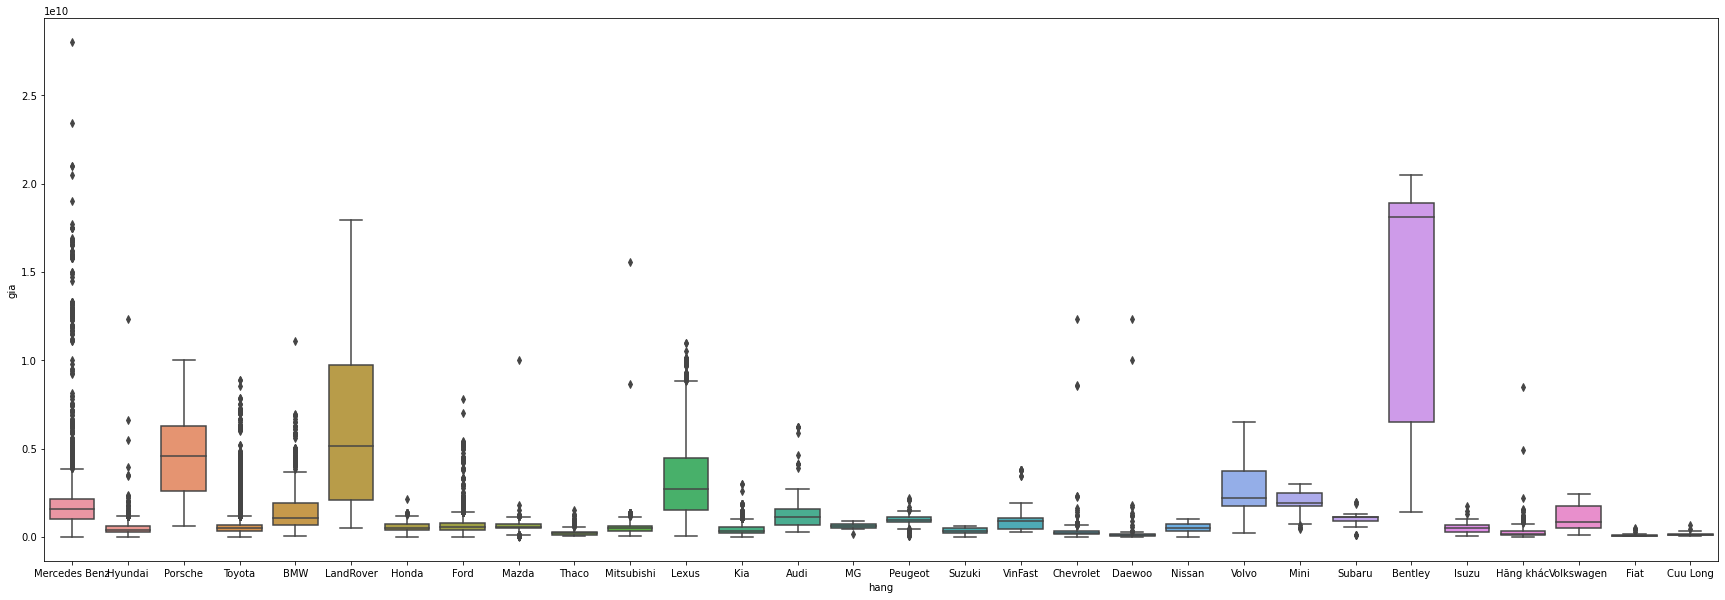

In [11]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "hang", y = "gia", data = df[ ( df.hang.isin(list(df.hang.value_counts().sort_values(ascending = False)[:30].index.get_level_values(0))) ) & ( df.gia < 1e11 )])
plt.show()

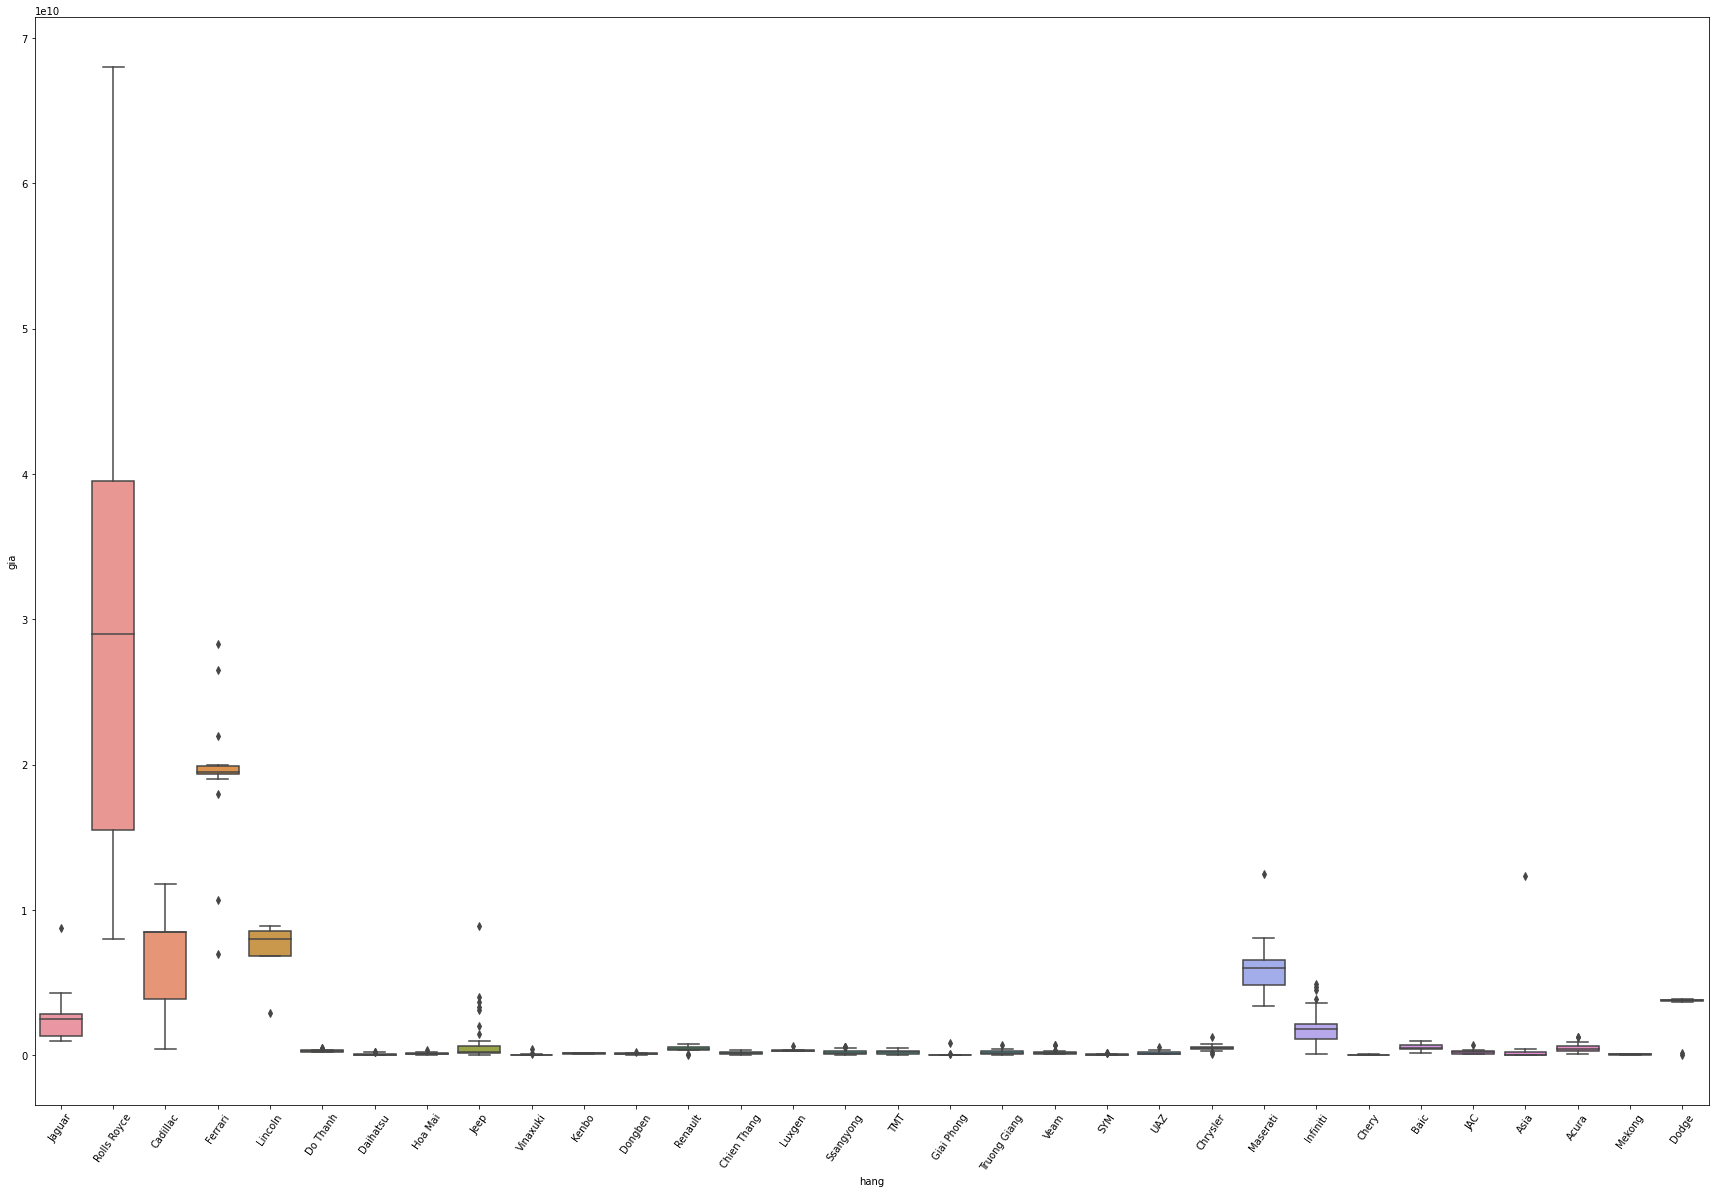

In [12]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(ax =ax, x = "hang", y = "gia", data = df[ ( df.hang.isin(list(df.hang.value_counts().sort_values(ascending = False)[30:].index.get_level_values(0))) ) & ( df.gia < 1e11 )])
plt.xticks(fontsize =10, rotation = 55)
plt.show()

### Kiểu dáng

##### Phân phối của kiểu dáng

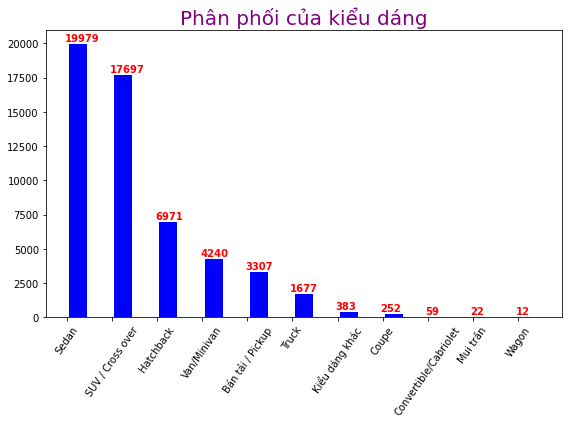

In [13]:
fig, ax = plt.subplots(figsize = (8,6))
x = []
y = []
for idx, value in enumerate(df['kieu_dang'].value_counts().items()):
    x.append(value[0])
    y.append(value[1])
    ax.text(x = idx-0.3, y = (value[1] + 200), s = str(value[1]), fontweight = "bold", color = 'red', fontdict=dict(fontsize=10))
    #print(value[1])
ax.bar(x,y, color = "blue", width = 0.4)
#plt.sca(ax1)
plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 10)
plt.yticks(fontsize = 10)
plt.title(label="Phân phối của kiểu dáng", fontdict=dict(fontsize = 20, color = "purple"))
plt.tight_layout()
plt.show()

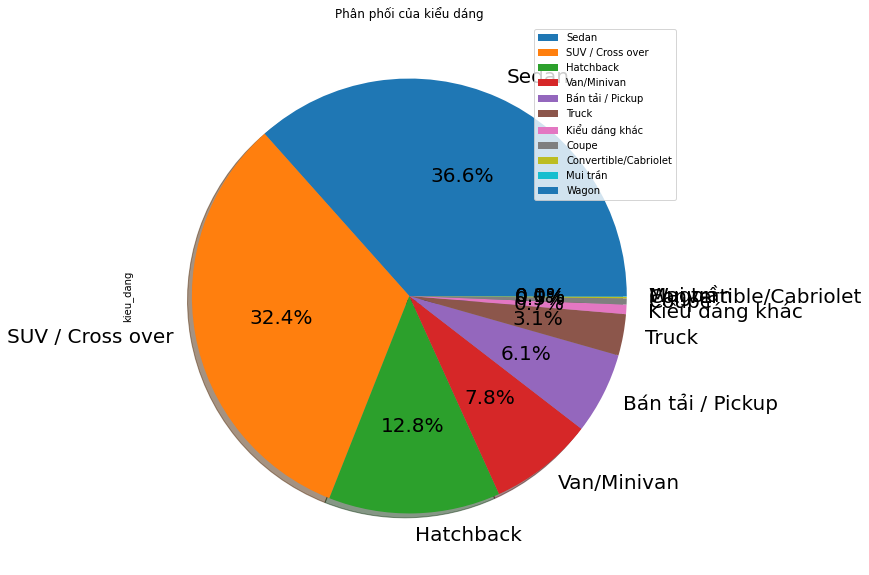

In [14]:
df['kieu_dang'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%', shadow = True, legend = True, figsize = (20,10), fontsize = 20)
#plt.legend(loc="upper right")
plt.title('Phân phối của kiểu dáng')
plt.show()

##### Hãng xe - Kiểu dáng

In [15]:
hd = df[["hang","kieu_dang"]].value_counts()
hang = hd.index.get_level_values(0)
kieu_dang = hd.index.get_level_values(1)
values = hd.values

hd = pd.DataFrame(columns=["Hãng xe", "Kiểu dáng", "Giá trị"])
hd["Hãng xe"] = hang
hd["Kiểu dáng"] = kieu_dang
hd["Giá trị"] = values

import plotly
import plotly.express as px
px.bar(data_frame = hd, x = "Hãng xe", y = "Giá trị", color = "Kiểu dáng")

In [16]:
index = list(df.hang.value_counts()[:20].index.get_level_values(0))
cols = list(hd['Kiểu dáng'].unique())
data = np.full((len(index) , len(cols)) ,0)
#hd[(hd["Hãng xe"] == "Toyota") & (hd['Kiểu dáng'] == "Sedan")]
for num_idx, idx in enumerate(index):
    for num_col, col in enumerate(cols):
        if len(list(hd[(hd["Hãng xe"] == idx) & (hd['Kiểu dáng'] == col)]['Giá trị'])) > 0:
            data[num_idx][num_col] = list(hd[(hd["Hãng xe"] == idx) & (hd['Kiểu dáng'] == col)]['Giá trị'])[0]
    
hd_heatmap = pd.DataFrame(columns=cols, index=index,data= data)
'''
hd_heatmap_2 = hd.pivot("Hãng xe","Kiểu dáng","Giá trị").fillna(0)
sns.heatmap(hd_heatmap_2)
'''

'\nhd_heatmap_2 = hd.pivot("Hãng xe","Kiểu dáng","Giá trị").fillna(0)\nsns.heatmap(hd_heatmap_2)\n'

<AxesSubplot:>

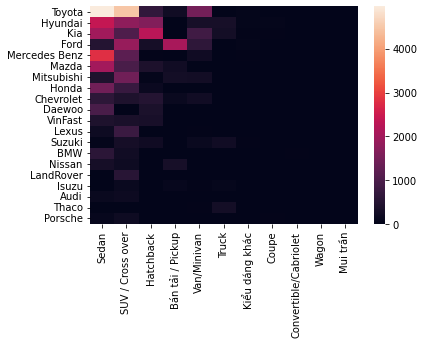

In [17]:
sns.heatmap(hd_heatmap)

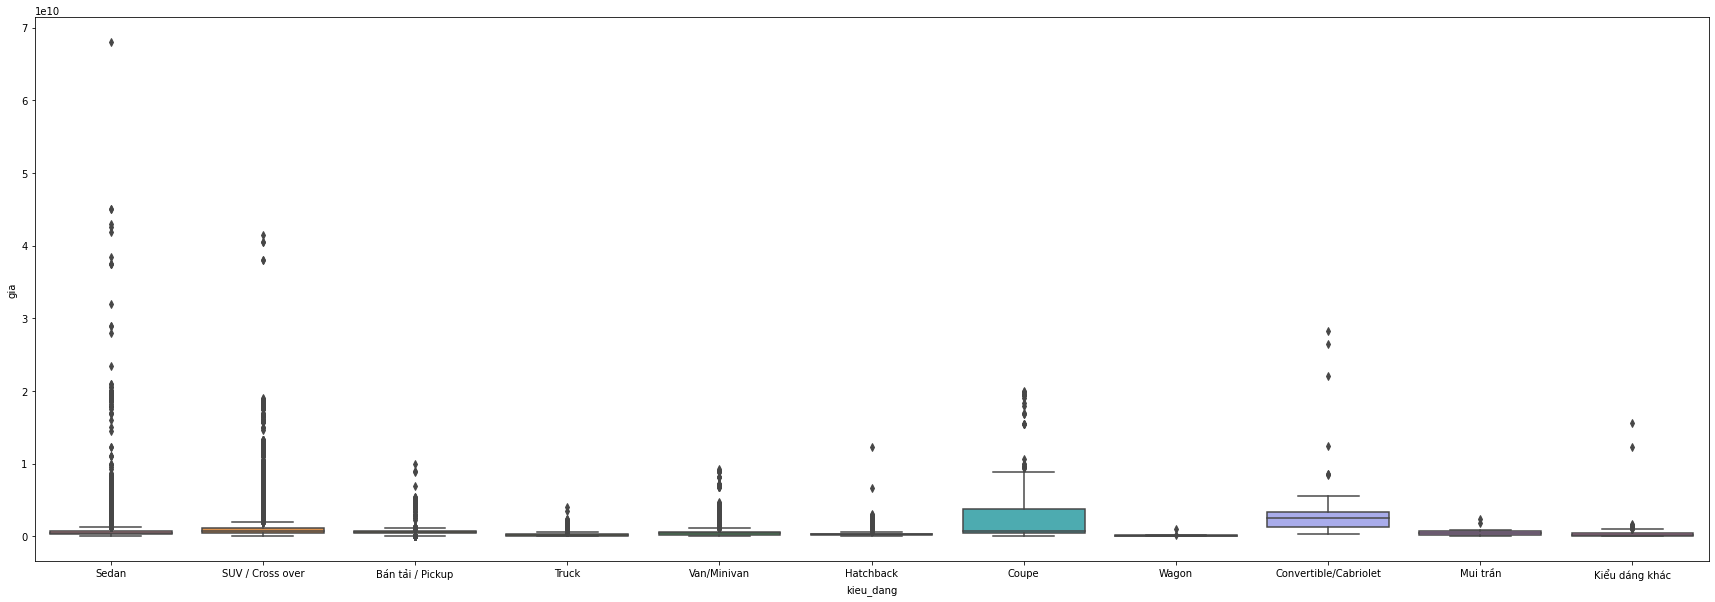

In [18]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "kieu_dang", y = "gia", data = df)
plt.show()

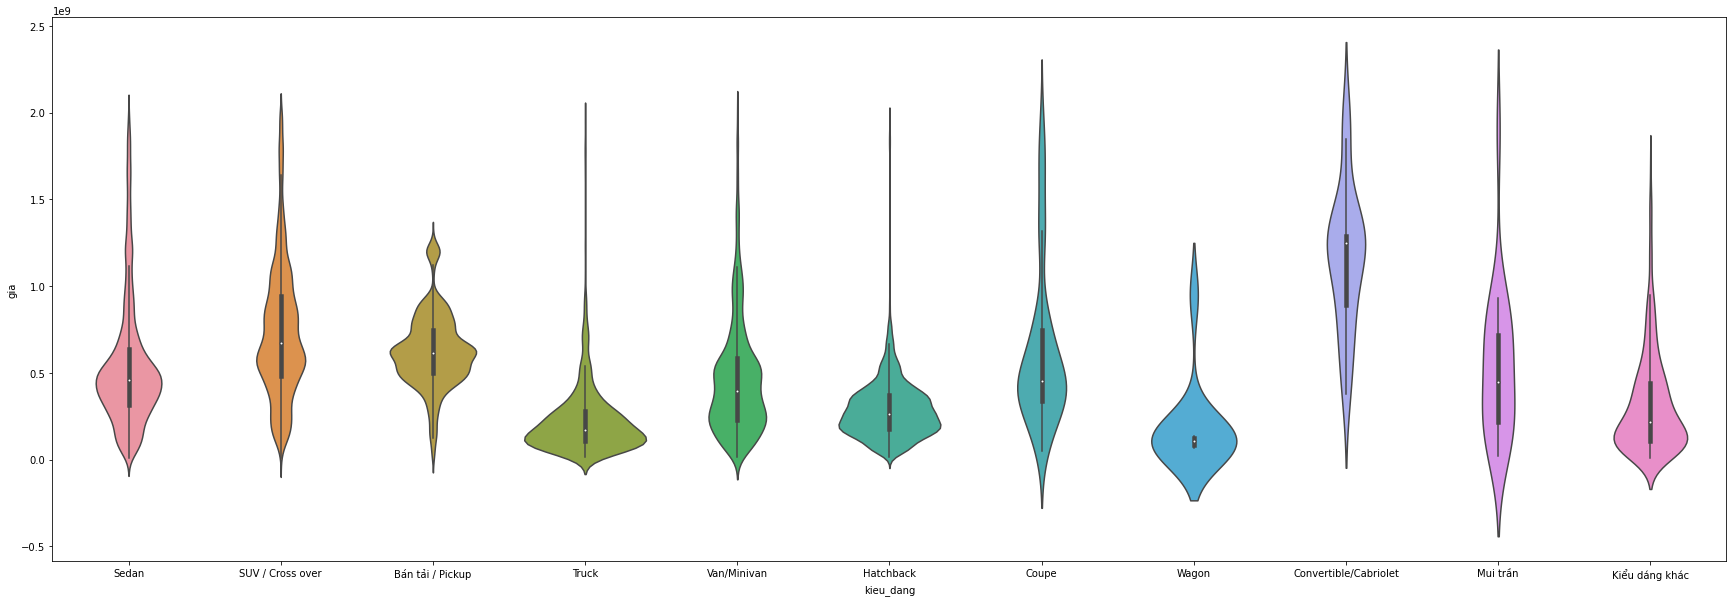

In [19]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "kieu_dang", y = "gia", data = df[df.gia < 2e9])
plt.show()

### Dòng xe

In [20]:
df.dong_xe.describe()

count      53876
unique       553
top       Innova
freq        2737
Name: dong_xe, dtype: object

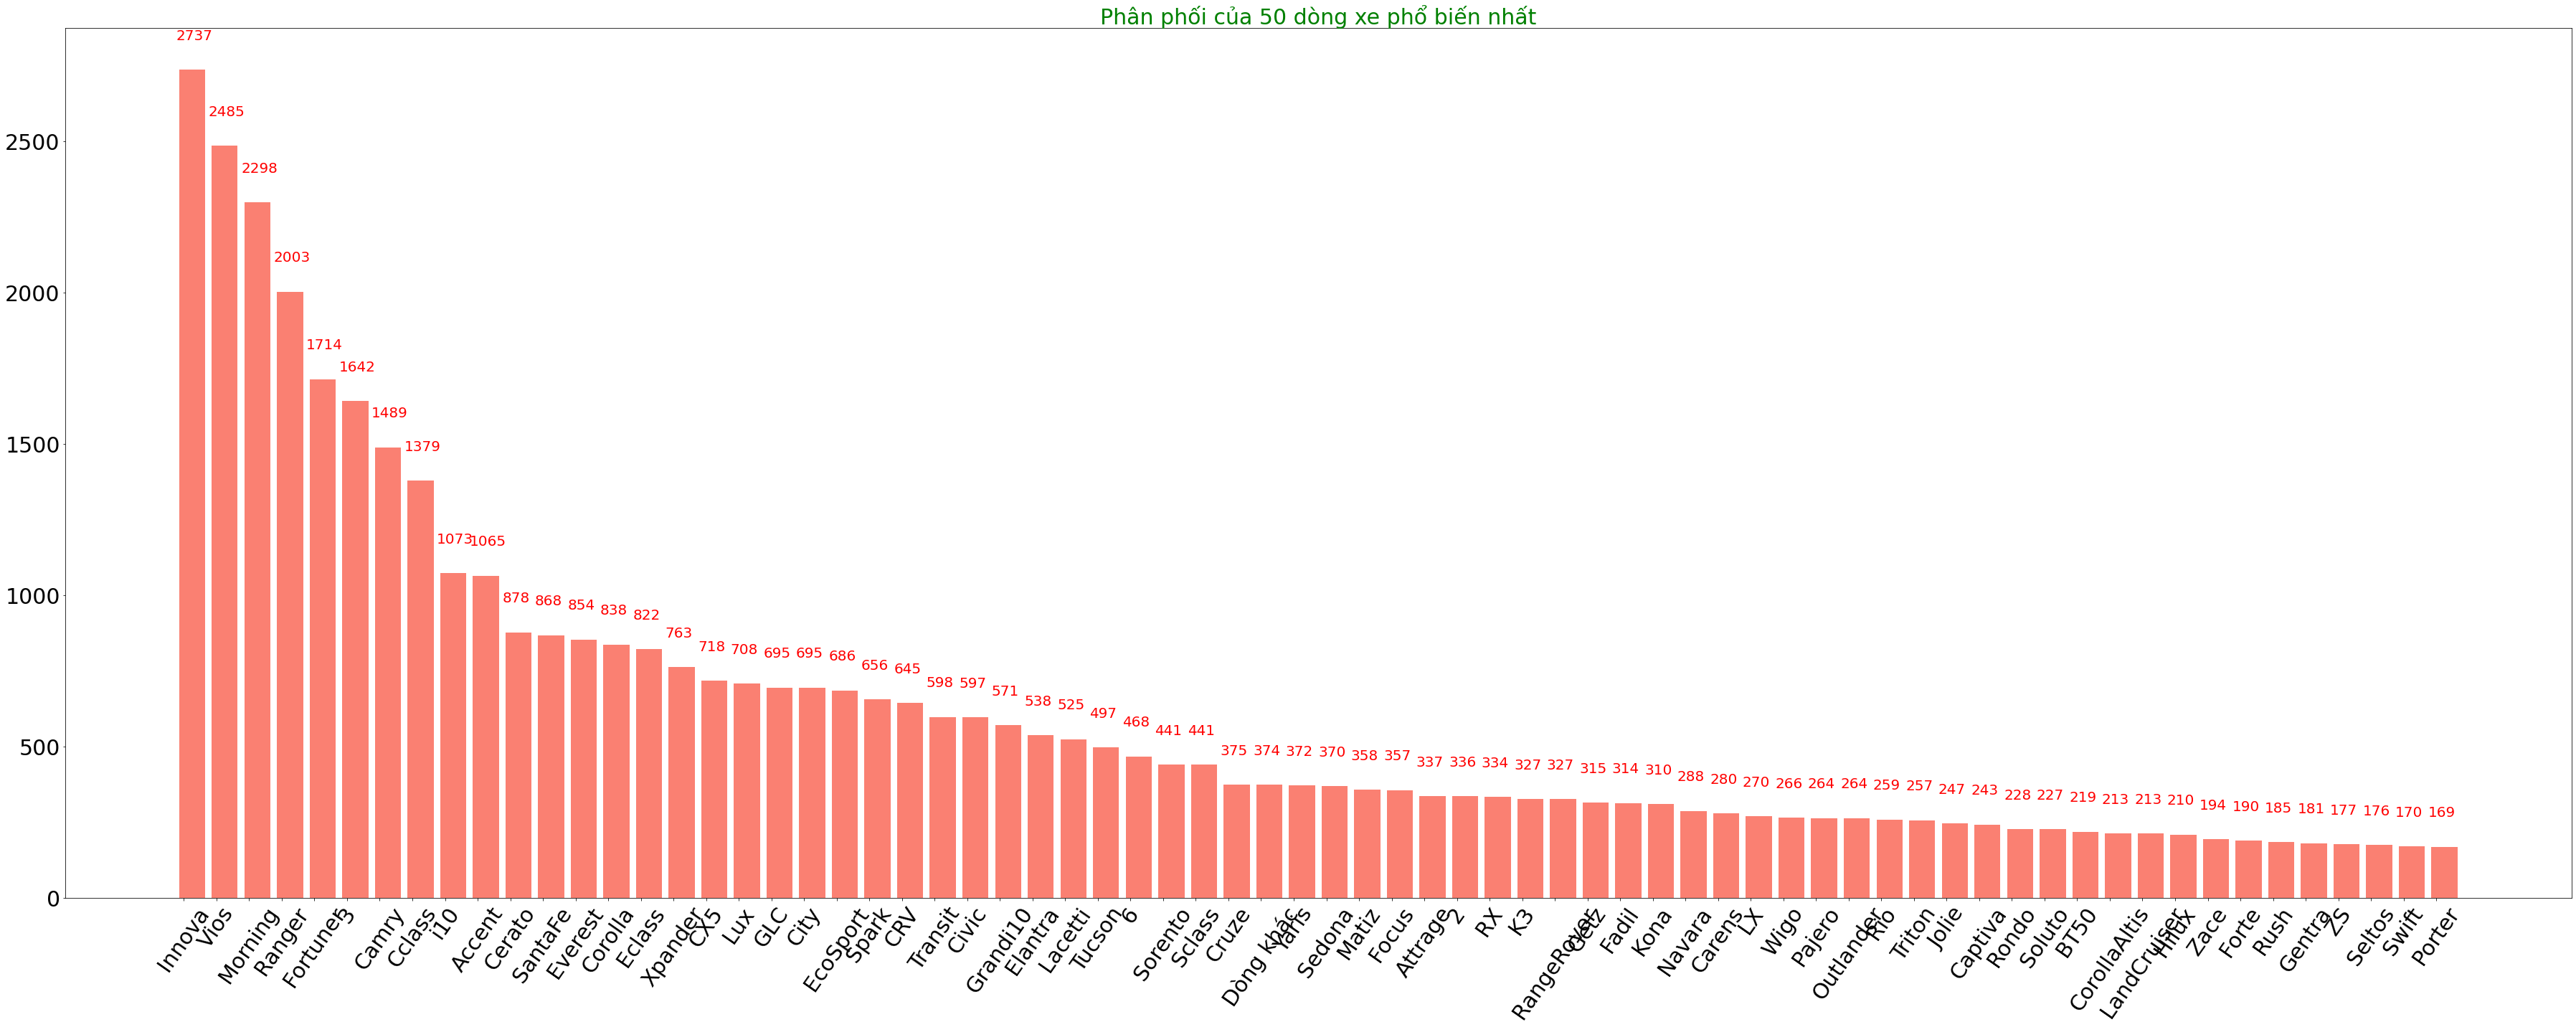

In [21]:
fig, ax = plt.subplots(figsize = (50,20))
x = []
y = []
for idx, value in enumerate(df['dong_xe'].value_counts()[:70].items()):
    x.append(value[0])
    y.append(value[1])
    ax.text(x = idx-0.5, y = (value[1] + 100), s = str(value[1]), color = 'red', fontdict=dict(fontsize=20))
    #print(value[1])
ax.bar(x,y, color = "salmon", width = 0.8)
#plt.sca(ax1)
plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 30)
plt.yticks(fontsize = 30)
plt.title(label="Phân phối của 50 dòng xe phổ biến nhất", fontdict=dict(fontsize = 30, color = "green"))
plt.tight_layout()
plt.show()

In [22]:
hd = df[["hang","dong_xe"]].value_counts()
hang = hd.index.get_level_values(0)
dong_xe = hd.index.get_level_values(1)
values = hd.values

hd = pd.DataFrame(columns=["Hãng xe", "Dòng xe", "Giá trị"])
hd["Hãng xe"] = hang
hd["Dòng xe"] = dong_xe
hd["Giá trị"] = values

import plotly
import plotly.express as px
px.bar(data_frame = hd, x = "Hãng xe", y = "Giá trị", color = "Dòng xe")

In [23]:
hd = df[["dong_xe", "kieu_dang"]].value_counts()
dong_xe = hd.index.get_level_values(0)
kieu_dang = hd.index.get_level_values(1)
values = hd.values

hd = pd.DataFrame(columns=["Dòng xe", "Kiểu dáng", "Giá trị"])
hd["Dòng xe"] = dong_xe
hd["Kiểu dáng"] = kieu_dang
hd["Giá trị"] = values

import plotly
import plotly.express as px
px.bar(data_frame = hd, x = "Kiểu dáng", y = "Giá trị", color = "Dòng xe")

### Năm sản xuất

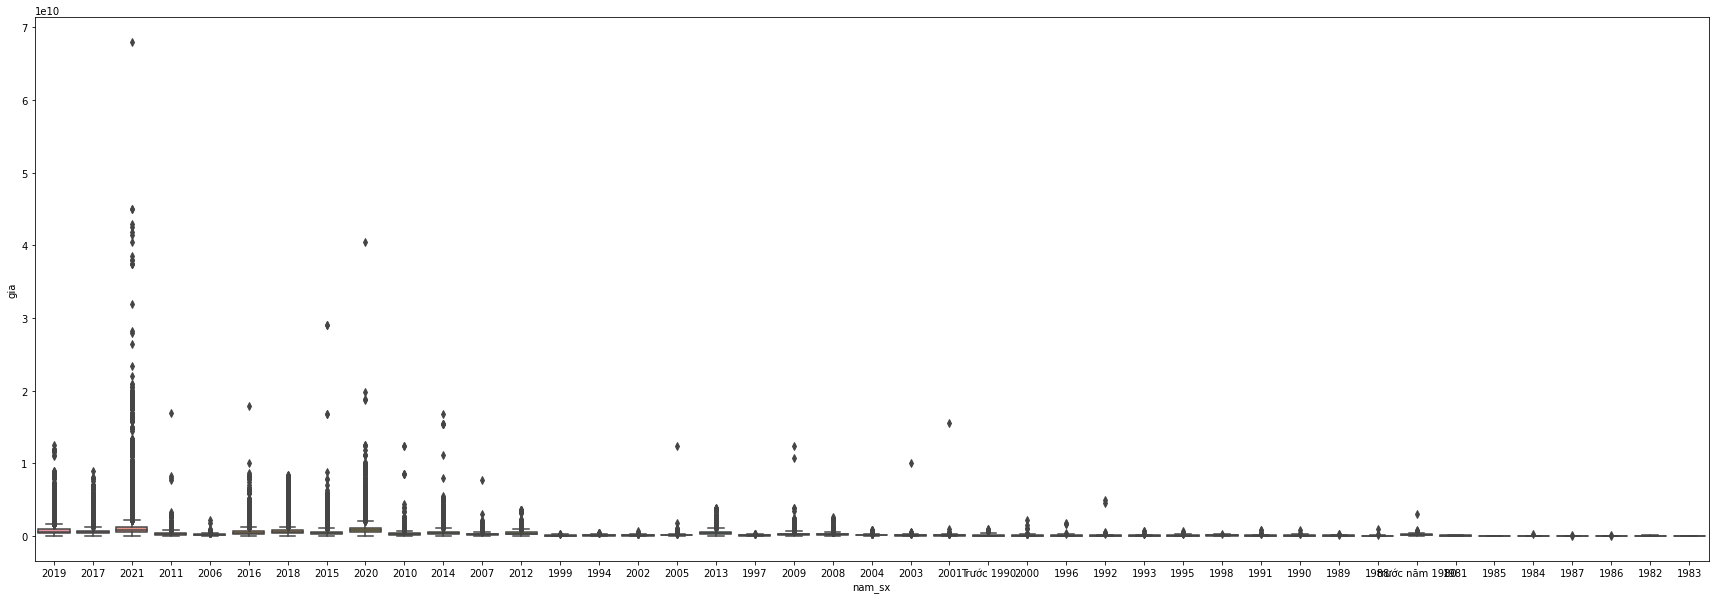

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "nam_sx", y = "gia", data = df)
plt.show()

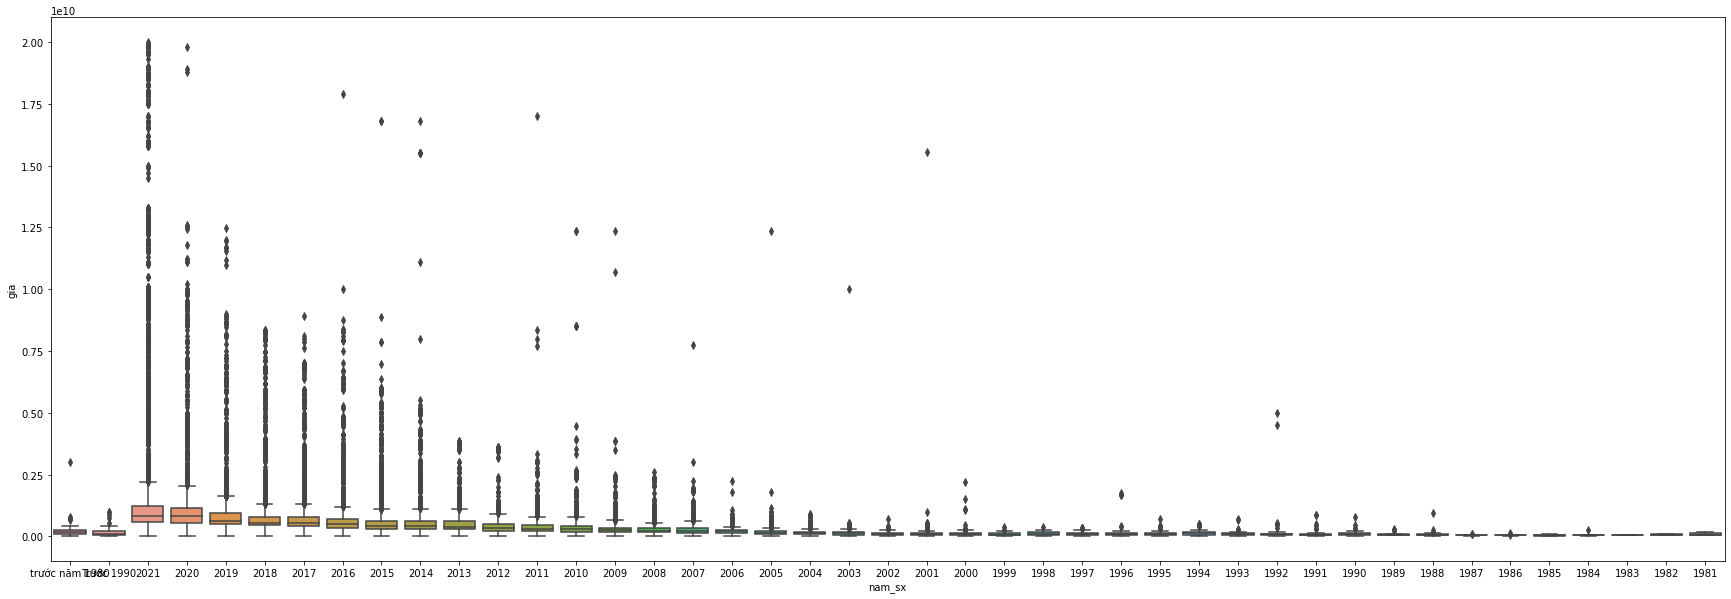

In [25]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "nam_sx", y = "gia", data = df[df.gia < 2e10].sort_values(by = "nam_sx", ascending = False))
#plt.xticks([i-0.25 for i in range(len(x))],x, rotation = 55,fontsize = 30)
plt.show()

### Tình trạng

Đã sử dụng    45125
Mới            9474
Name: tinh_trang, dtype: int64


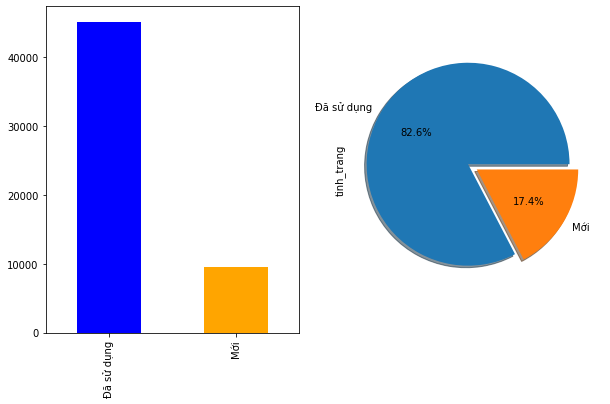

In [26]:
print(df.tinh_trang.value_counts())
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
df.tinh_trang.value_counts().plot(kind = "bar", ax = ax1, color = ["blue", "orange"])
df.tinh_trang.value_counts().plot(kind = "pie", ax = ax2, shadow = True, autopct='%1.1f%%', explode = (0.1,0))
plt.show()

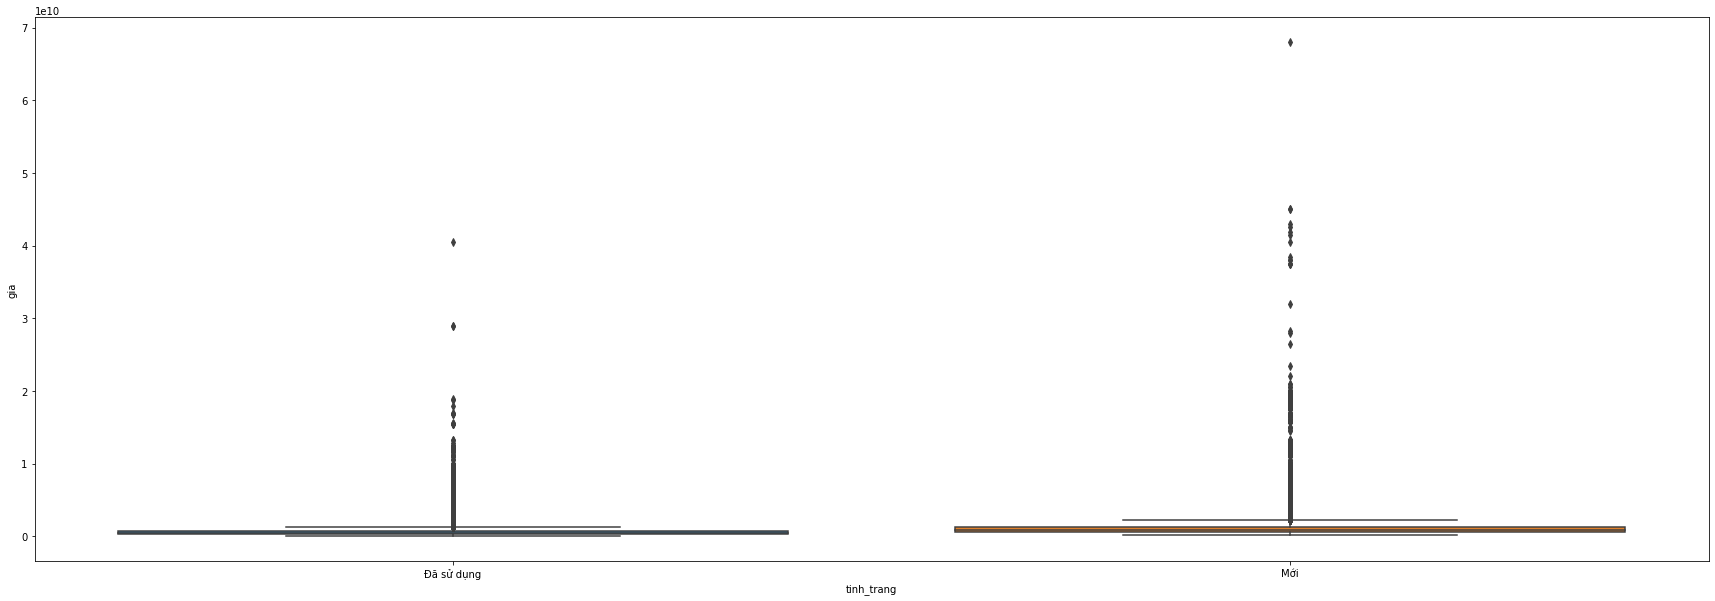

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax =ax, x = "tinh_trang", y = "gia", data = df)
plt.show()

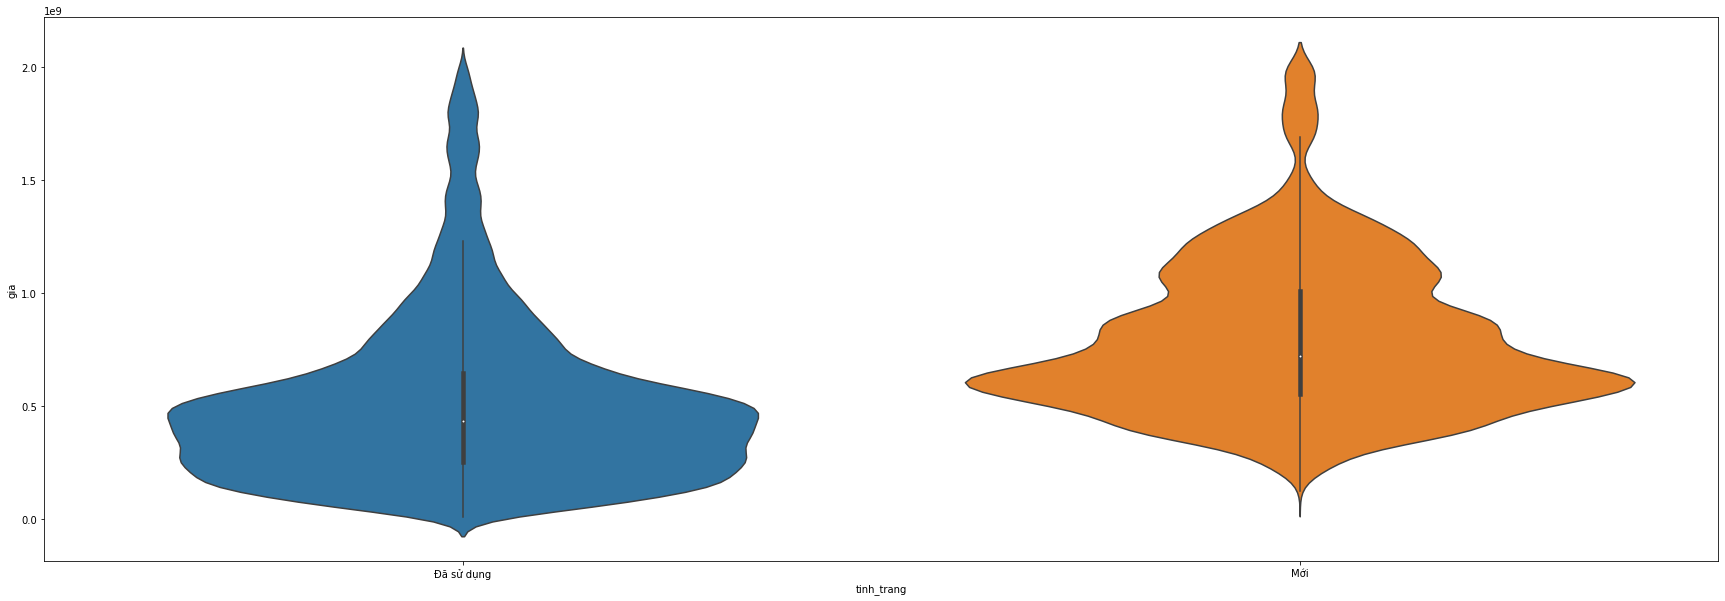

In [28]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "tinh_trang", y = "gia", data = df[df.gia < 2e9])
plt.show()

### Số km đã đi

In [29]:
df[(df.km_da_di == 0) & (df.tinh_trang == "Mới")][['nam_sx', 'km_da_di','tinh_trang']]

,nam_sx,km_da_di,tinh_trang
2,2021,0,Mới
3,2021,0,Mới
5,2021,0,Mới
11,2021,0,Mới
12,2021,0,Mới
...,...,...,...
35941,2021,0,Mới
35946,2021,0,Mới
35951,2021,0,Mới
35952,2021,0,Mới


In [30]:
# Xe mới nhưng có số km đã đi > 0???
df[(df.km_da_di < 1e6) & (df.km_da_di > 0) & (df.tinh_trang == "Mới")][['nam_sx', 'km_da_di','tinh_trang']]

# Những xe có km đã đi > 0 ====> Đã sử dụng
df.loc[df.km_da_di > 0, 'tinh_trang'] = "Đã sử dụng"

In [31]:
# Đã sử dụng nhưng km đã đi = 0???
df[(df.km_da_di == 0) & (df.tinh_trang == "Đã sử dụng")][['nam_sx', 'km_da_di','tinh_trang']]

fail = df.loc[(df.tinh_trang == "Đã sử dụng") & (df.km_da_di == 0)].nam_sx
year = []
for idx,i in enumerate(list(fail.values)):
    if "Trước" in i:
        i = i.split()[1]
        year.append(int(i))
    else:
        year.append(int(i))
# Trung bình 1 năm đi được 20000 km
tb_km_da_di = [20000*(2022-y) for y in year]
df.loc[fail.index, 'km_da_di'] = tb_km_da_di

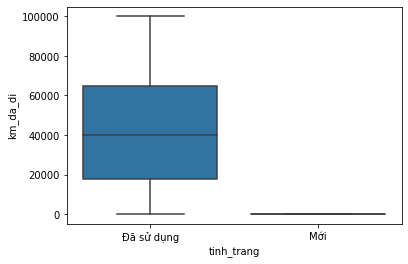

In [32]:
sns.boxplot(x = "tinh_trang", y = "km_da_di", data = df[df.km_da_di < 1e5])
plt.show()

In [35]:
df = df[df.km_da_di < 1e9]
import plotly.express as px
fig = px.scatter(df, y="gia", x="km_da_di")
fig.update_traces(marker_size=10)
fig.show()

### Xuất xứ

Lắp ráp trong nước    32820
Nhập khẩu             21778
Name: xuat_xu, dtype: int64


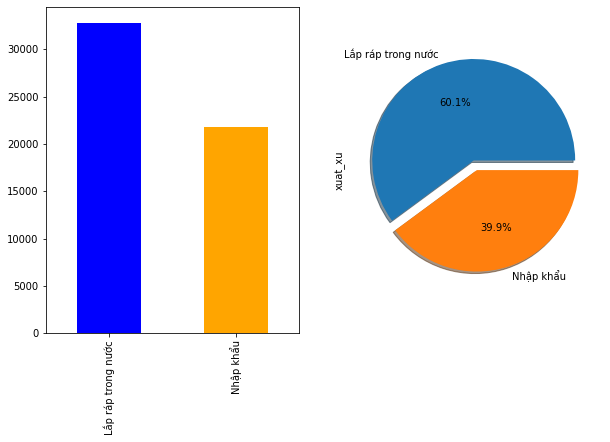

In [38]:
print(df.xuat_xu.value_counts())
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
df.xuat_xu.value_counts().plot(kind = "bar", ax = ax1, color = ["blue", "orange"])
df.xuat_xu.value_counts().plot(kind = "pie", ax = ax2, shadow = True, autopct='%1.1f%%', explode = (0.1,0))
plt.show()

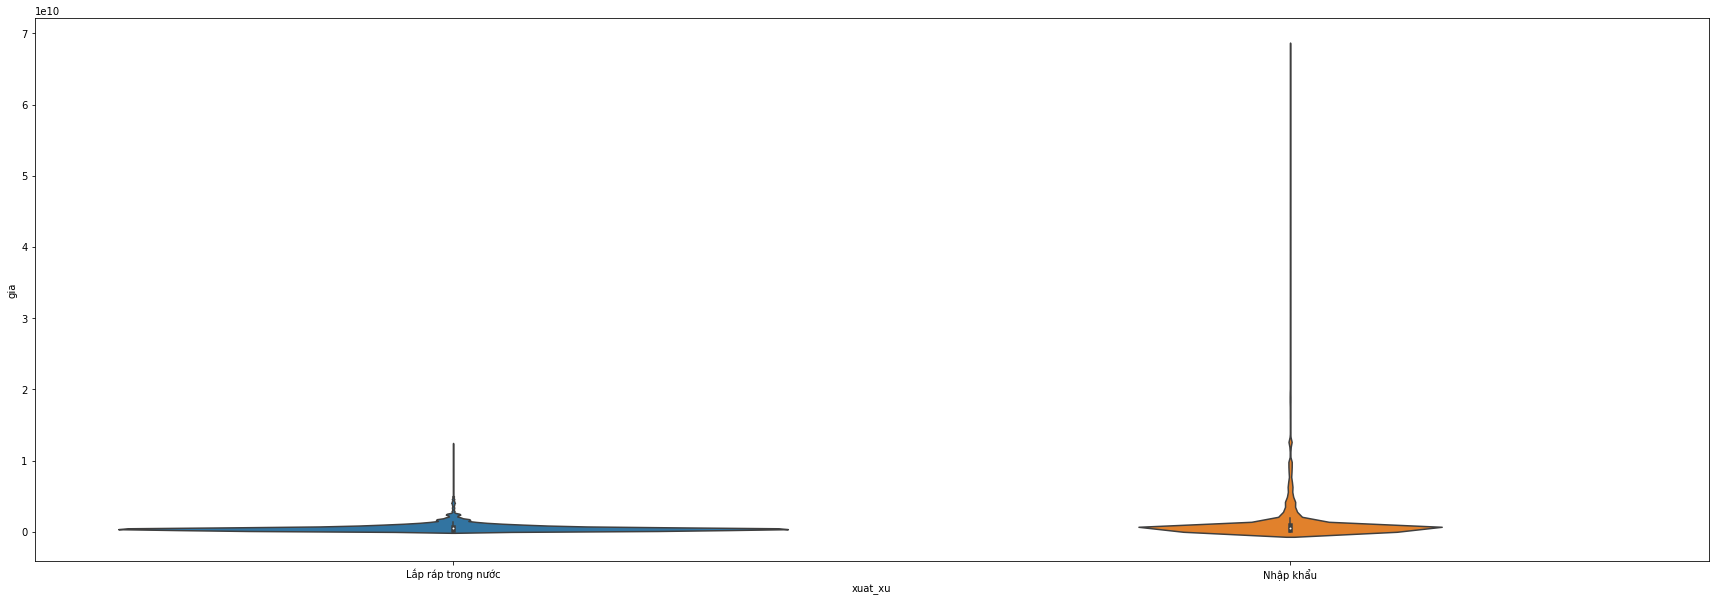

In [42]:
fig, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax =ax, x = "xuat_xu", y = "gia", data = df)
plt.show()